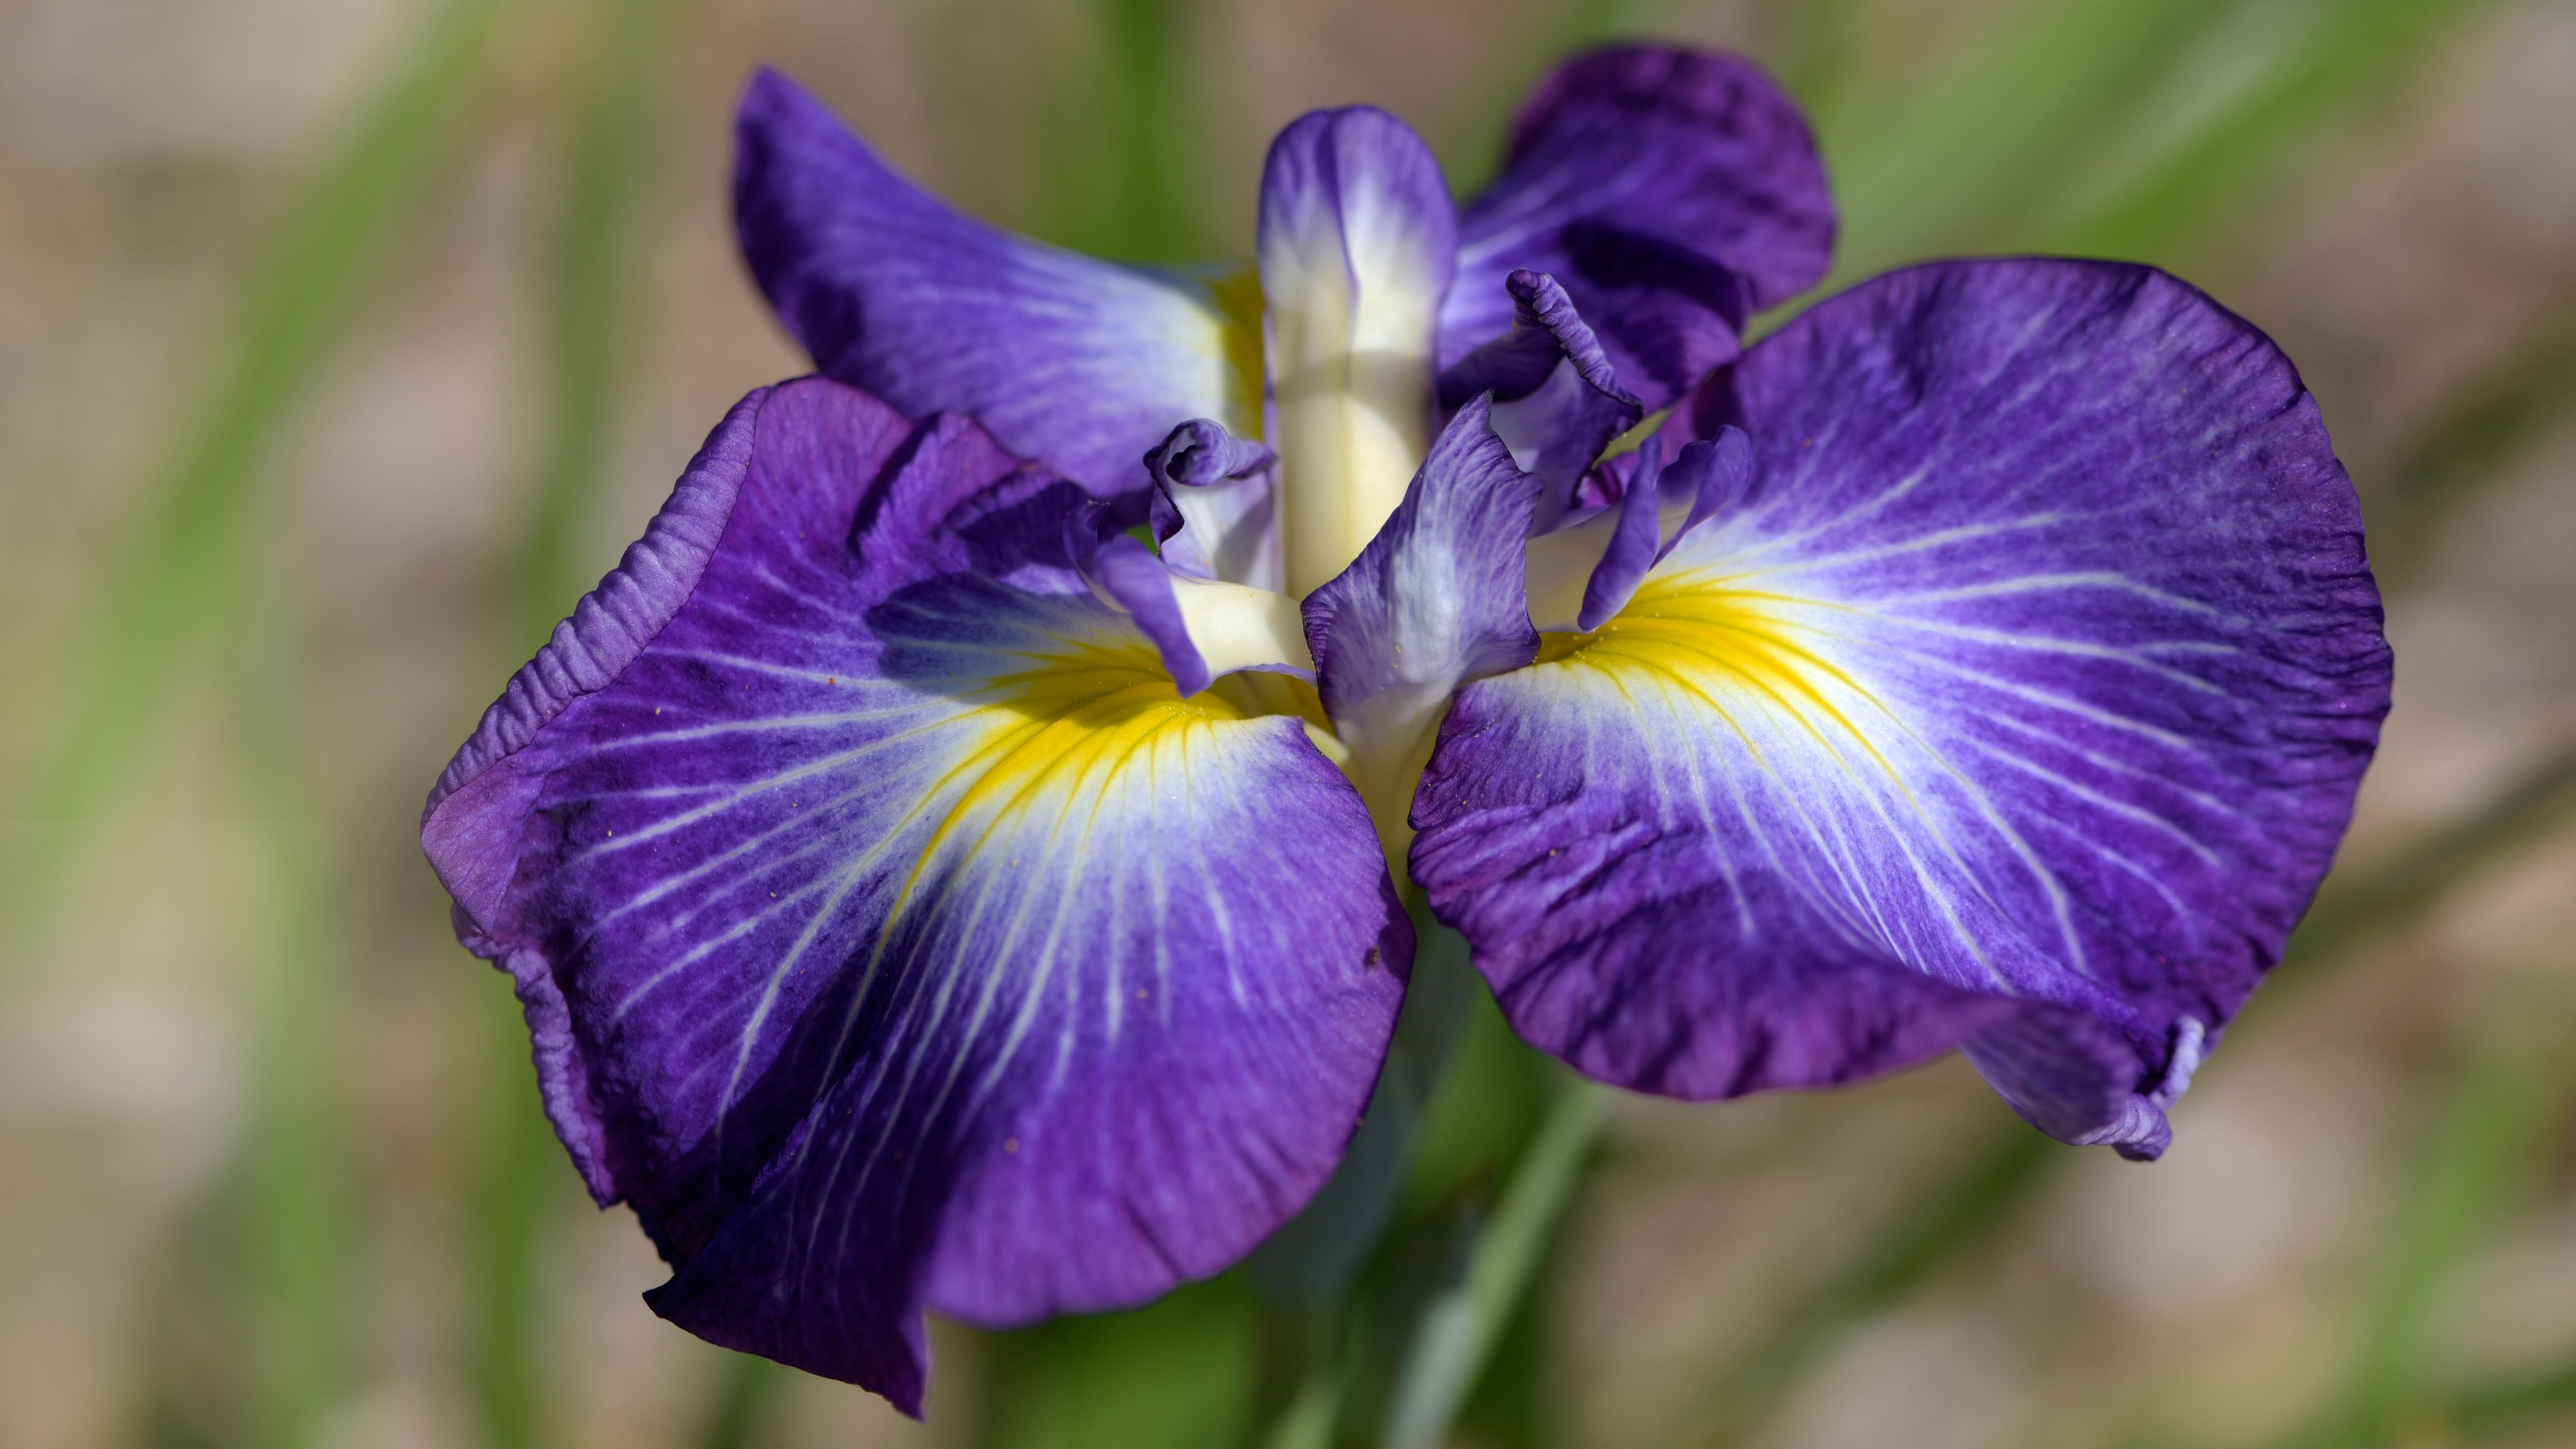

## Classification of Iris dataset using Support Vector Machine Algorithm

# Step 1 : Import The Libraries

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score

# Step 2 : Import the Dataset & Data Cleansing If Necessary

In [2]:
iris = pd.read_csv('iris.csv')
iris.head()

,Id,Sepal Length (cm),Sepal Width (cm),Petal Length (cm),Petal Width (cm),Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
X = iris[['Sepal Length (cm)','Sepal Width (cm)','Petal Length (cm)','Petal Width (cm)']]
y = iris['Species']

# Step 3 : Split The Cleaned Dataset Into Training & Testing Dataset

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [8]:
lst = ['Sepal Length (cm)','Sepal Width (cm)','Petal Length (cm)','Petal Width (cm)']

# Step 4 : Use Column Transformer For Transforming The Features

In [9]:
column_transformer = ColumnTransformer([('numerical',StandardScaler(),lst)],verbose_feature_names_out=False)

In [10]:
column_transformer.get_feature_names_out

<bound method ColumnTransformer.get_feature_names_out of ColumnTransformer(transformers=[('numerical', StandardScaler(),
                                 ['Sepal Length (cm)', 'Sepal Width (cm)',
                                  'Petal Length (cm)', 'Petal Width (cm)'])],
                  verbose_feature_names_out=False)>

# Step 5 : Make Pipeline to Automate The Process

In [14]:
pipe = make_pipeline(column_transformer,SVC())

In [15]:
le = LabelEncoder()

In [16]:
le.fit_transform(y_train)

array([0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0, 0, 1, 2, 2, 1, 2, 1, 2,
       1, 0, 2, 1, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0, 1, 2, 0, 1, 2, 0, 2, 2,
       1, 1, 2, 1, 0, 1, 2, 0, 0, 1, 1, 0, 2, 0, 0, 1, 1, 2, 1, 2, 2, 1,
       0, 0, 2, 2, 0, 0, 0, 1, 2, 0, 2, 2, 0, 1, 1, 2, 1, 2, 0, 2, 1, 2,
       1, 1, 1, 0, 1, 1, 0, 1, 2, 2, 0, 1, 2, 2, 0, 2, 0, 1, 2, 2, 1, 2,
       1, 1, 2, 2, 0, 1, 2, 0, 1, 2])

In [22]:
le.classes_

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

# Step 6 : Fitting &  Predicting Using Pipeline

In [17]:
pipe.fit(X_train,le.fit_transform(y_train))

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numerical', StandardScaler(),
                                                  ['Sepal Length (cm)',
                                                   'Sepal Width (cm)',
                                                   'Petal Length (cm)',
                                                   'Petal Width (cm)'])],
                                   verbose_feature_names_out=False)),
                ('svc', SVC())])

In [18]:
pipe.predict(X_test)

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [19]:
y_test

73     Iris-versicolor
18         Iris-setosa
118     Iris-virginica
78     Iris-versicolor
76     Iris-versicolor
31         Iris-setosa
64     Iris-versicolor
141     Iris-virginica
68     Iris-versicolor
82     Iris-versicolor
110     Iris-virginica
12         Iris-setosa
36         Iris-setosa
9          Iris-setosa
19         Iris-setosa
56     Iris-versicolor
104     Iris-virginica
69     Iris-versicolor
55     Iris-versicolor
132     Iris-virginica
29         Iris-setosa
127     Iris-virginica
26         Iris-setosa
128     Iris-virginica
131     Iris-virginica
145     Iris-virginica
108     Iris-virginica
143     Iris-virginica
45         Iris-setosa
30         Iris-setosa
Name: Species, dtype: object

In [24]:
pipe.score(X_test,le.fit_transform(y_test))

1.0

In [26]:
cross_val_score(pipe, X_train, le.fit_transform(y_train),cv=5).mean()

0.95